## Shelter Animal Outcomes
### MIDS W207 Final Project
### Clay Miller, Roseanna Hopper, Yubo Zhang
### Exploratory Data Analysis

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
#Load training data
data = pd.read_csv('../data/train.csv')

#Split the train data into a train and dev set
np.random.seed(0)
train, dev = train_test_split(data, test_size = 0.3)

print len(train)
print len(dev)

18710
8019


In [12]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2/12/2014 18:22,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,10/13/2013 12:44,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,1/31/2015 12:28,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,7/11/2014 19:09,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,11/15/2013 12:52,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


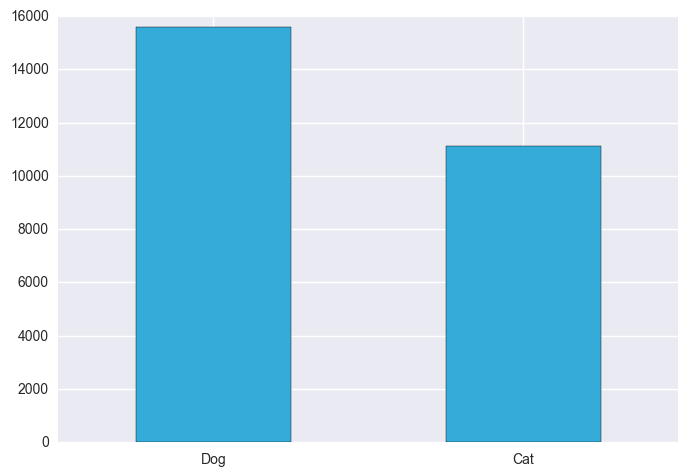

In [13]:
#A quick look at the variables

#Animal types
animal_type = data['AnimalType'].value_counts() 
animal_type.plot(kind='bar',color='#34ABD8',rot=0)

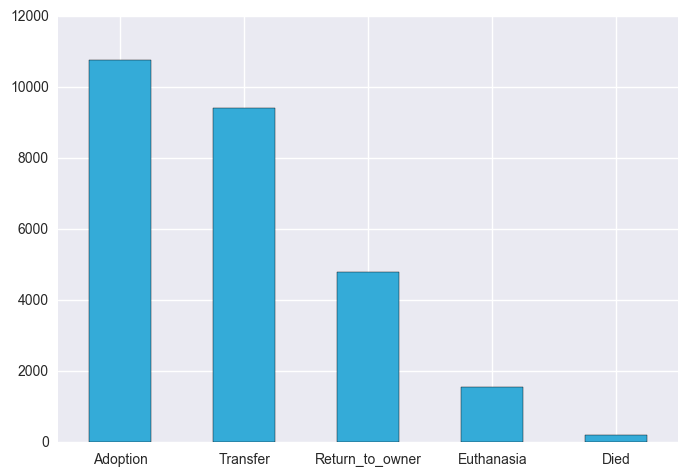

In [14]:
#Outcome types
outcome_type = data['OutcomeType'].value_counts() 
outcome_type.plot(kind='bar',color='#34ABD8',rot=0)

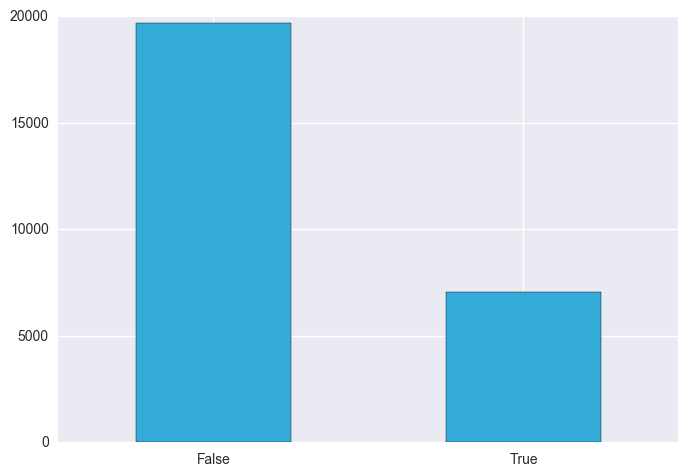

In [16]:
#Spayed/neutered
data['Intact'] = data['SexuponOutcome'].str.lower().str.contains('intact')
intact_type = data['Intact'].value_counts() 
intact_type.plot(kind='bar',color='#34ABD8',rot=0)

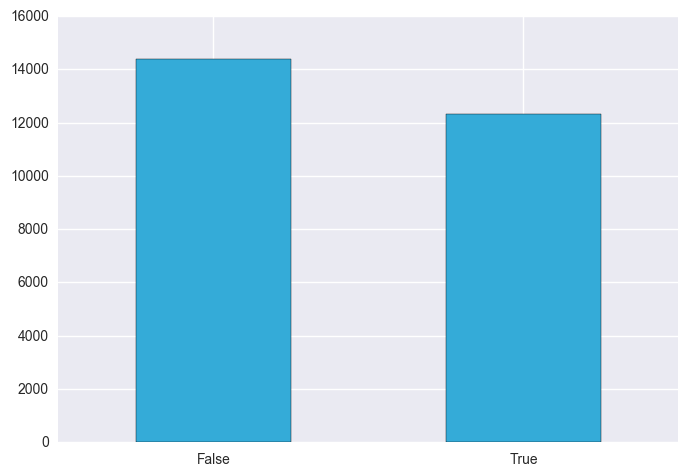

In [17]:
#Sex
data['Female'] = data['SexuponOutcome'].str.lower().str.contains('female')
intact_type = data['Female'].value_counts() 
intact_type.plot(kind='bar',color='#34ABD8',rot=0)

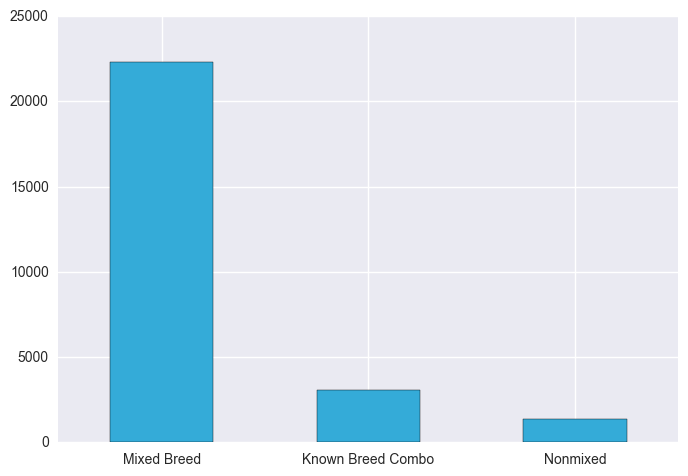

In [31]:
#Purebred/mixed

def mixed_breed(i):
    i = str(i)
    if i.find('Mix') >= 0: return 'Mixed Breed'
    if i.find('/') >= 0: return 'Known Breed Combo'
    return 'Nonmixed'
data['mixed_breed'] = data.Breed.apply(mixed_breed)
mixed_breed = data['mixed_breed'].value_counts() 
mixed_breed.plot(kind='bar',color='#34ABD8',rot=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000138B3630>]], dtype=object)

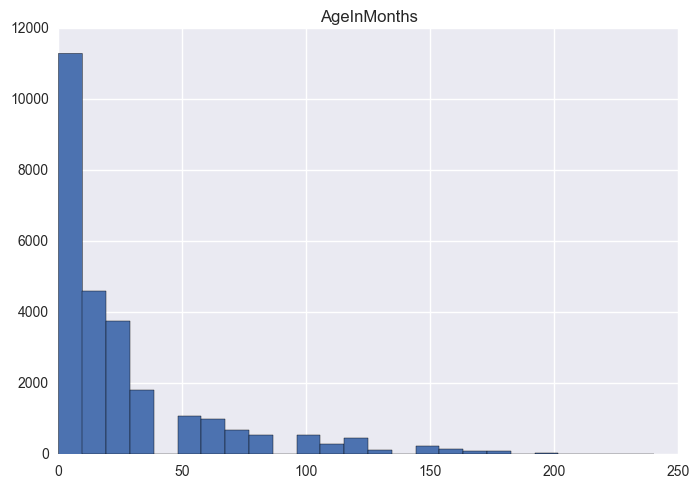

In [45]:
#Week and month multipliers from Google unit converter.
def age_in_months(i):
    i = str(i)
    if i == 'nan': return 0
    age = int(i.split()[0])
    if i.find('year') > -1: return age*12
    if i.find('month')> -1: return age
    if i.find('week')> -1: return age*0.23
    if i.find('day')> -1: return age*0.0328767
    if i.find('NaN')> -1: return 'Unknown'
    else: return 0

data['AgeInMonths'] = data.AgeuponOutcome.apply(age_in_months)
data.hist(column="AgeInMonths", bins=25)